In [1]:
import pandas as pd

In [2]:
ad=pd.read_csv("Advertising.csv")
df=ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


indexi değişken olarak aldığı için düzenleme yapıyoruz.

In [3]:
df=df.iloc[:,1:len(df)]

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Aynı sorunu gidermek için şu da yapılabilirdi:

In [5]:
#ad=pd.read_csv("Advertising.csv",usecols=[1,2,3,4])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


TV'nin standart sapması biraz yüksek fakat bu bir sorun değil. Standart sapma yayılımla ilgili bilgi veriyor. Büyükse daha çok yayılmış. Küçükse daha homojen deriz. Minimum değerin çok düşük olduğunu gözlemleyebiliriz. 

Eğer mean ve medyan arasında çok fark varsa ve çeyrekliklerin arasında da düzensizlik varsa dağılım çarpıktır deriz ve işte bu bir problem. 2-3 tepeli bir yapı olabileceğini ve çok farklı faktörlerce etkilenmiş olabileceği anlamlarına geliyor.

Totalde bakarsak veri setinin yapısal olarak pek bir bozukluğu olduğundan söz edemeyiz. 

Veri setinde eksik yerler var mı diye inceleyelim.

In [8]:
df.isnull().values.any()

False

yokmuş:)

Korelasyonu inceleyelim.

In [9]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


TV ve Sales arasında yüksek bir korelasyon var. TV harcamaları arttıkça satışlar da artar diye yorumlayabiliriz.

In [10]:
import seaborn as sns

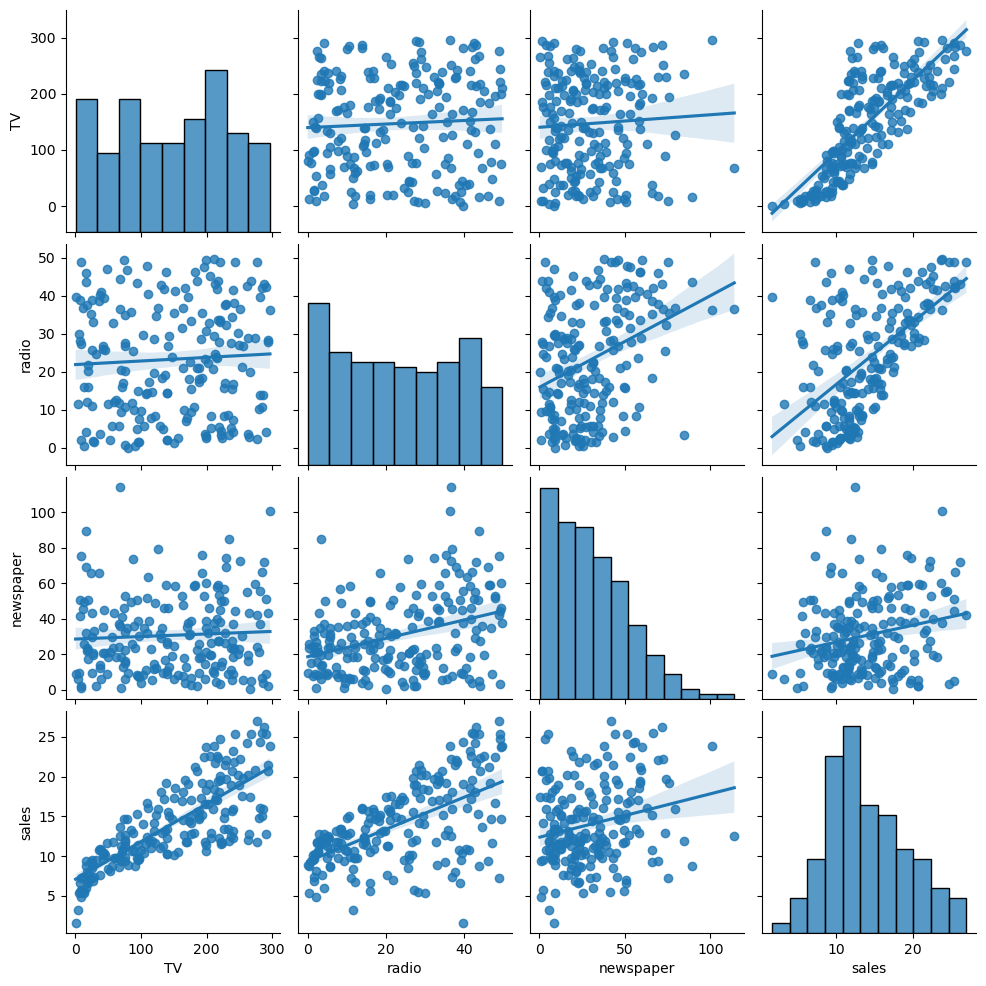

In [11]:
sns.pairplot(df,kind="reg");

Görsellere baktığımızda gazetelerin verisinin oldukça çarpık olduğunu görebiliriz

TV ve satışlar arasındaki pozitif ilşkiyi tekrardan burada pekiştirebiliriz.

Korelasyon büyüklüğü, tablolardaki eğimin şiddetini de belirliyor.

TV ve satış arasındaki ilişkiye odaklanmak istiyorum.

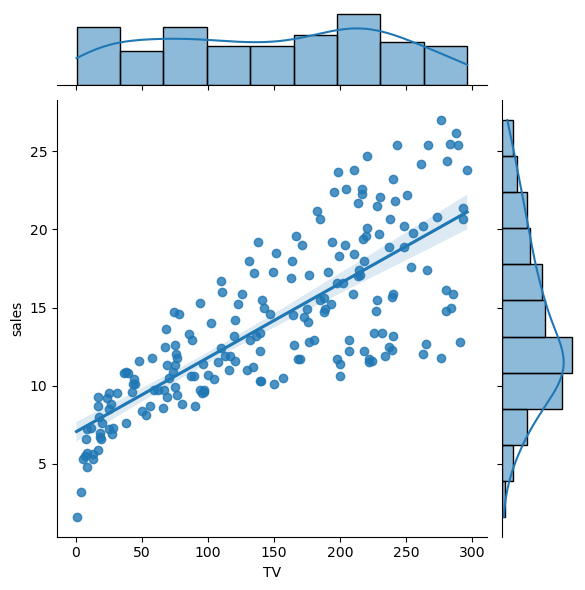

In [12]:
sns.jointplot(x="TV",y="sales", data=df, kind="reg")

Modelde, sadece tahmin başarısının yüksek olması bize bana başarılı olduğumu söylemez. Değişkenleri, birbirine olan etki düzeylerini de iyi anaiz etmek lazım.

Satış verilerinin normal veriye yakın olduğun söyleyebilirim.

# Statsmodels ile Modelleme

In [13]:
import statsmodels.api as sm

In [14]:
X=df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


Elimizde tek değişkenden oluşan bir matris var. TV değişkenini X matris olarak kaydettik. Bu matris tek değişkenden oluştuğu için ve üzerinde matris işlemlerini yapabilmemiz için sabit sayı ekleriz.

In [15]:
X = sm.add_constant(X)

In [16]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


X'imiz yani bağımsız değişkenimiz hazır. Şimdi bağımlı değişkenimizi(y) alalım.

In [17]:
y=df[["sales"]]

In [18]:
y[0:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


Modelimizi kuralım. Teknik anlamda OOP initialize işlemi yani.

In [19]:
lm=sm.OLS(y,X)

Şimdi gerçek modeli fit edelim.

In [21]:
model=lm.fit()

Şimdi modelin çıktılarına erişip yorum yapalım.

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 13 May 2023   Prob (F-statistic):           1.47e-42
Time:                        23:28:41   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Bu geniş çaplı çıktıyı ve istatistiksel ayrıntıları sktlearn kütüphanesi ile alamıyoruz. Sktlearn çok geniş çaplı olanaklar sunsa da güven aralığı, parametrelerin anlamlığı, modelin anlamlılığı vb. farklı istatistikleri verme konusunda pek iyi değil. Tam bu işler için geliştirilmiş kütüphane statsmodels.

Rapordaki R-squared, bağımsız değişkenin bağımlı değişkenin değişkenliğini açıklama başarısıdır. Yani burada elimizdeki TV değişkeninin satıştaki değişkenliğinin %61.2'sinde açıklayabilmektedir. 

Düzeltilmiş Rkare (Adj. R-squared) ile R-squared arasında fark var. Veri setine ne kadar değişken eklersek ekleyelim şişmeye yatkındır. Adj. R-squared'in duyarlılığı daha azdır. Bunlardan daha az etkilenir. Bu yüzden bu bizim için daha düzgün bir değerdir.

F-statistic, bize modelin anlamlılığını ölçer. Prob (F-statistic), F-statistic'in p değeridir.

Const ve TV katsayılarımız istatistiksel olarak anlamlıdır. Çünkü P>|t| değerleri sıfır. TV'ye ilişkin 0.0475 olan katsayımız istatistiksel olarak anlamlıdır ve bu katsayımız istatistiksel olarak %95 güvenilirlikle 0.042-0.053 aralığındadır.

7.0326 için, TV'nin etkisi olmadığındaki satışlarımız için beklenen değer deriz.

0.0475 TV harcamalarında 1 birimlik artış olduğunda satışta ortalama olacak artışı gösterir.

Raproun sonuçlarına aşağıdaki gibi bir yolla da ulaşabiliriz.

In [24]:
import statsmodels.formula.api as smf
lm=smf.ols("sales ~ TV",df)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 13 May 2023   Prob (F-statistic):           1.47e-42
Time:                        23:28:48   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [26]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [27]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [28]:
print("f_pvalue: ", "%.4f"%model.f_pvalue)

f_pvalue:  0.0000


In [29]:
print("fvalue: ","%.2f"% model.fvalue)

fvalue:  312.14


In [30]:
print("tvalue: ", "%.2f"% model.tvalues[0:1])

tvalue:  15.36


In [31]:
model.mse_model

3314.618166868649

Bu, modelin başarısı ile ilgili istatistik şu ana kadar baktığımız. Hata kareler ortalaması demektir. Ortalaması 14 olan bir değişken için yapılan birim hata korkunç kötü.

In [32]:
model.rsquared

0.611875050850071

Gerçek hayat için uygun bir değer, kötü değil.

In [33]:
model.rsquared_adj

0.6099148238341623

Modelin tahmin ettiği değerlere erişmek önemli. Bunu gözlemlemek istersek:

In [34]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

Gerçek değerlere erişmek istersek:

In [35]:
y[0:5]

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


Modelin matematiksel formu:

In [36]:
print("Sales= "+ str("%.2f"%model.params[0])+ "+TV"+ "*"+str("%.2f"%model.params[1]))

Sales= 7.03+TV*0.05


In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
X = df[["TV"]]
y = df["sales"]
reg=LinearRegression()
model=reg.fit(X,y)
model.intercept_
model.coef_

array([0.04753664])

In [39]:
model.score(X,y)

0.611875050850071

In [40]:
model.predict(X[0:10])

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

20 birim TV harcaması olursa satışların tahmini değeri kaç olur?

In [47]:
7.03+20*0.05

8.030000000000001

Eğer predict fonksiyonuyla bunu sorarsak:

In [43]:
X = df[["TV"]]
y = df["sales"]
reg=LinearRegression()
model=reg.fit(X,y)

In [48]:
model.predict([[40]])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.93405917])

Birden fazla sayı ile ilgili tahmin yapmak istersek:

In [49]:
yeni_veri=[[10],[30],[78]]

In [50]:
model.predict(yeni_veri)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 7.50795995,  8.45869276, 10.7404515 ])